# Data analysis for Three Body Problem
## Information about the dataset
Train data: <br>
| Variable  | Description                                      |
|-----------|--------------------------------------------------|
| `t`       | timestep                                         |
| `x_1`     | coordinate x of the position of object 1         |
| `y_1`     | coordinate y of the position of object 1         |
| `v_x_1`   | coordinate x of the velocity of object 1         |
| `v_y_1`   | coordinate y of the velocity of object 1         |
| `x_2`     | coordinate x of the position of object 2         |
| `y_2`     | coordinate y of the position of object 2         |
| `v_x_2`   | coordinate x of the velocity of object 2         |
| `v_y_2`   | coordinate y of the velocity of object 2         |
| `x_3`     | coordinate x of the position of object 3         |
| `y_3`     | coordinate y of the position of object 3         |
| `v_x_3`   | coordinate x of the velocity of object 3         |
| `v_y_3`   | coordinate y of the velocity of object 3         |

Test data:<br>

| Variable  | Description                                                    |
|-----------|----------------------------------------------------------------|
| `t`       | timestep                                                       |
| `x0_1`    | coordinate x of the position of object 1 at time t=0           |
| `y0_1`    | coordinate y of the position of object 1 at time t=0           |
| `x0_2`    | coordinate x of the position of object 2 at time t=0           |
| `y0_2`    | coordinate y of the position of object 2 at time t=0           |
| `x0_3`    | coordinate x of the position of object 3 at time t=0           |
| `y0_3`    | coordinate y of the position of object 3 at time t=0           |

For the test data, we only have the initial positions, and we assume that the initial velocity is zero


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Data

In [2]:
df = pd.read_csv("../data/mlNOVA/mlNOVA/X_train.csv")
df_test = pd.read_csv("../data/mlNOVA/mlNOVA/X_test.csv")

### Statistics

In [6]:
df.head()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4


In [7]:
df.tail()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
1284995,9.84375,-0.022787,-0.354678,-1.450539,-0.511101,-0.128897,-0.618452,1.066492,-0.497032,0.151684,0.973131,0.384048,1.008133,1284995
1284996,9.88281,-0.082072,-0.384254,-1.556362,-1.038875,-0.084507,-0.627569,1.177829,0.065469,0.166578,1.011822,0.378533,0.973406,1284996
1284997,9.92188,-0.140434,-0.438907,-1.348462,-1.794786,-0.040823,-0.610311,0.975436,0.853069,0.181257,1.049218,0.373027,0.941717,1284997
1284998,9.96094,-0.177344,-0.524277,-0.380080,-2.492241,-0.018380,-0.561151,0.012292,1.579595,0.195724,1.085428,0.367788,0.912645,1284998
1284999,10.00000,-0.163264,-0.618197,1.029575,-2.079003,-0.046730,-0.502346,-1.392434,1.193499,0.209994,1.120543,0.362860,0.885505,1284999


In [5]:
df.columns

Index(['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2',
       'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id'],
      dtype='object')

In [8]:
df.describe()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
count,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06
mean,4.145262e+00,-2.812879e-01,-1.095159e-01,-1.841267e-01,-1.650011e-02,7.171403e-03,-8.201144e-02,3.247712e-02,-8.360838e-02,2.741165e-01,1.915273e-01,1.516496e-01,1.001085e-01,6.424995e+05
std,3.209813e+00,1.695764e+00,1.167686e+00,8.775115e-01,8.064175e-01,1.062984e+00,1.038606e+00,9.362290e-01,9.751777e-01,1.443411e+00,1.683294e+00,7.878988e-01,8.709405e-01,3.709477e+05
min,0.000000e+00,-3.082300e+01,-1.785773e+01,-7.299333e+01,-2.310928e+01,-3.083340e+01,-5.245081e+01,-2.589555e+01,-4.828901e+01,-1.743999e+01,-3.316000e+01,-3.097054e+01,-2.550938e+01,0.000000e+00
25%,1.054690e+00,-4.118489e-01,-3.928434e-01,-5.782370e-01,-2.266108e-01,-3.295574e-01,-1.918623e-01,-2.983937e-01,-4.984175e-01,-4.324075e-01,-4.472183e-01,-1.019181e-01,-2.062900e-01,3.212498e+05
50%,3.945310e+00,0.000000e+00,0.000000e+00,-6.909794e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.306061e-04,6.181826e-02,1.402483e-02,6.424995e+05
75%,6.953120e+00,5.008268e-01,2.634242e-01,1.321657e-01,2.444148e-01,2.103091e-01,2.683916e-01,3.880151e-01,3.262901e-01,5.005791e-01,3.508870e-01,4.864241e-01,4.975648e-01,9.637492e+05
max,1.000000e+01,1.634061e+01,2.627623e+01,2.350346e+01,3.467168e+01,1.550696e+01,3.567946e+01,7.271823e+01,2.311835e+01,6.165640e+01,2.773554e+01,2.596499e+01,4.828874e+01,1.284999e+06


In [4]:
df_test.head()

,Id,t,x0_1,y0_1,x0_2,y0_2,x0_3,y0_3
0,0,0.000000,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
1,1,0.039062,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
2,2,0.078125,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
3,3,0.117188,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
4,4,0.156250,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085


In [9]:
df_test.tail()

,Id,t,x0_1,y0_1,x0_2,y0_2,x0_3,y0_3
1041616,1041616,9.84375,1.0,0.0,-0.207166,0.852911,-0.792834,-0.852911
1041617,1041617,9.88281,1.0,0.0,-0.207166,0.852911,-0.792834,-0.852911
1041618,1041618,9.92188,1.0,0.0,-0.207166,0.852911,-0.792834,-0.852911
1041619,1041619,9.96094,1.0,0.0,-0.207166,0.852911,-0.792834,-0.852911
1041620,1041620,10.00000,1.0,0.0,-0.207166,0.852911,-0.792834,-0.852911


In [10]:
df_test.columns

Index(['Id', 't', 'x0_1', 'y0_1', 'x0_2', 'y0_2', 'x0_3', 'y0_3'], dtype='object')

In [11]:
df_test.describe()

,Id,t,x0_1,y0_1,x0_2,y0_2,x0_3,y0_3
count,1.041621e+06,1.041621e+06,1041621.0,1041621.0,1.041621e+06,1.041621e+06,1.041621e+06,1.041621e+06
mean,5.208100e+05,5.000000e+00,1.0,0.0,-2.309950e-01,5.144233e-01,-7.690050e-01,-5.144233e-01
std,3.006902e+05,2.898007e+00,0.0,0.0,1.375241e-01,2.545084e-01,1.375241e-01,2.545084e-01
min,0.000000e+00,0.000000e+00,1.0,0.0,-4.979092e-01,6.846025e-03,-9.998843e-01,-9.657217e-01
25%,2.604050e+05,2.500000e+00,1.0,0.0,-3.459596e-01,3.036559e-01,-8.892568e-01,-7.371673e-01
50%,5.208100e+05,5.000000e+00,1.0,0.0,-2.293032e-01,5.175921e-01,-7.706968e-01,-5.175921e-01
75%,7.812150e+05,7.500000e+00,1.0,0.0,-1.107432e-01,7.371673e-01,-6.540404e-01,-3.036559e-01
max,1.041620e+06,1.000000e+01,1.0,0.0,-1.157003e-04,9.657217e-01,-5.020908e-01,-6.846025e-03


## Some Visualizations

In [12]:
idx = np.hstack((0, df[df.t == 10].index.values +1))
print(idx.shape, df.t.min(), df.t.max())
print(idx)

(4054,) 0.0 10.0
[      0     257     514 ... 1284486 1284743 1285000]


In [13]:
def plot_indx(k):
    """Given an index k, prints the respective trajetories

    Parameters
    ----------
    k : int
        The row of the trajetory

    """
    print(k) # The index being used
    pltidx = range(idx[k], 257+idx[k])
    pltsquare = idx[k]

    # Plot the tragetories
    plt.plot(df.x_1[pltidx], df.y_1[pltidx])
    plt.plot(df.x_2[pltidx], df.y_2[pltidx])
    plt.plot(df.x_3[pltidx], df.y_3[pltidx])

    # Plot the initial positions
    plt.plot(df.x_1[pltsquare], df.y_1[pltsquare], 's')
    plt.plot(df.x_2[pltsquare], df.y_2[pltsquare], 's')
    plt.plot(df.x_3[pltsquare], df.y_3[pltsquare], 's')

    plt.show()

1748


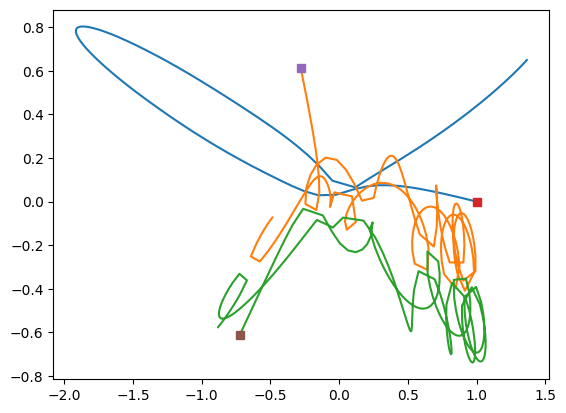

In [18]:
# Selecting a random index from the dataset
k = np.random.randint(idx.shape[0])
plot_indx(k)

### Colisions
When the 3 objects colide, the following lines until the end of the sample is filled with zeros. These zeros are meaningless

619


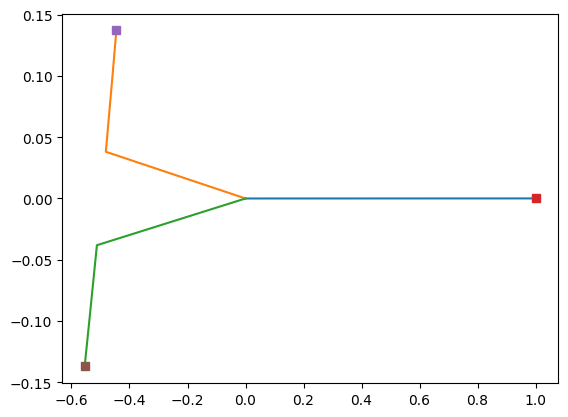

In [15]:
k = 619
plot_indx(k)

## Cleaning the data
Removing the rows after a colision, where all the values are zero.

In [30]:
# Filter rows where its all zeros
df['trajectory_id'] = (df.index // 257) + 1
df_cleaned = df.drop(columns=["Id"])
df_cleaned = df_cleaned.loc[~(df_cleaned.drop(columns='trajectory_id')==0).all(axis=1)]

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,trajectory_id
257,0.000000,1.000000,0.000000,0.000000,0.000000,-0.176502,0.555739,0.000000,0.000000,-0.823498,-0.555739,0.000000,0.000000,2
258,0.039062,0.999392,0.000131,-0.031160,0.006723,-0.176326,0.555148,0.008985,-0.030279,-0.823065,-0.555279,0.022176,0.023556,2
259,0.078125,0.997564,0.000525,-0.062415,0.013460,-0.175799,0.553372,0.017992,-0.060639,-0.821765,-0.553898,0.044423,0.047179,2
260,0.117188,0.994513,0.001183,-0.093859,0.020224,-0.174920,0.550408,0.027043,-0.091163,-0.819593,-0.551591,0.066816,0.070939,2
261,0.156250,0.990228,0.002106,-0.125591,0.027029,-0.173686,0.546247,0.036162,-0.121934,-0.816542,-0.548353,0.089430,0.094905,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,9.843750,-6.537450,3.157181,-0.534477,0.288987,3.412052,-1.494181,-0.091984,0.699908,3.125398,-1.663001,0.626461,-0.988894,2
510,9.882810,-6.558316,3.168464,-0.533886,0.288701,3.402849,-1.470691,-0.371051,0.493592,3.155467,-1.697773,0.904937,-0.782294,2
511,9.921880,-6.579160,3.179736,-0.533299,0.288417,3.383651,-1.456379,-0.604558,0.228374,3.195509,-1.723357,1.137857,-0.516791,2
512,9.960940,-6.599980,3.190997,-0.532715,0.288135,3.356237,-1.453839,-0.789860,-0.113452,3.243744,-1.737158,1.322575,-0.174684,2


## Creating the Test and Train tests

In [64]:
# Features
# X -> [x_1(0) y_1(0) x_2(0) y_2(0) x_3(0) y_3(0) t]
# y -> [x_1(t) y_1(t) x_2(t) y_2(t) x_3(t) y_3(t)]

# X - From the starting positions and the increment t
# y_train - The actual positions without the t variable

X = pd.DataFrame()
size = len(df_cleaned)
nr_samples = df_cleaned['trajectory_id'].max()
first_rows = df_cleaned.groupby('trajectory_id').first().reset_index()

for row in first_rows:
    repeated_rows = pd.DataFrame([row] * 257, columns=first_rows.index)
    X = pd.concat([X, repeated_rows], ignore_index=True)

X




ValueError: Shape of passed values is (257, 1), indices imply (257, 4998)